# Task 1: Data Cleaning and Preparation:

Q1. Load the dataset into a DataFrame or equivalent data structure.

Q2. Handle missing values appropriately (e.g., imputation, deletion).

Q3. Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

Q4. Detect and treat outliers if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame or equivalent data structure.
df= pd.read_csv('Cardiotocographic.csv')
print("Original DataFrame:")
df

Original DataFrame:


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [2]:
# Handle missing values appropriately (e.g., imputation, deletion).

# Imputation using mean for numerical columns
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Imputation using mode for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Dropping rows with any missing values
df.dropna(axis=0, inplace=True)

# Display modified DataFrame
print("Modified DataFrame after handling missing values:")
df

Modified DataFrame after handling missing values:


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [3]:
# Identifying data inconsistencies

# Identify Data Types
print("Data Types:")
print(df.dtypes)

Data Types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


These data types are consistent with the stored values.

In [4]:
# Detect and treat outliers if necessary.

# Display original DataFrame
print("Original DataFrame before treating Outliers:")
df

Original DataFrame before treating Outliers:


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [5]:
# Detect outliers using z-score method

z_scores = np.abs(zscore(df))
threshold = 3  # Define a threshold (typically |z-score| > 3 indicates an outlier)

outliers = (z_scores > threshold).any(axis=1)
outlier_rows = df[outliers]

print("Outliers detected using z-score method:")
outlier_rows

Outliers detected using z-score method:


LB        AC        FM        UC        DL            DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
8     122.0  0.038567  0.000000  0.001517  0.000000  0.000000e+00  0.000000   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.000000e+00  0.000000   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.000000e+00  0.000826   
...     ...       ...       ...       ...       ...           ...       ...   
2033  129.0  0.000000  0.001122  0.006734  0.005767  4.249675e-06  0.002245   
2060  127.0  0.038567  0.000000  0.005663  0.000000  0.000000e+00  0.000000   
2075  130.0  0.007011  0.000876  0.000876  0.000000 -1.353180e-03  0.000000   
2088  133.0  0.000000  0.001236  0.006180  0.000000 -8.720000e-07  0.000000   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.000000e+00  0.000000   

           ASTV      MSTV  ALTV  MLTV  Width  Tendency       NSP  
5     26.000000  5.900000   0.0   0.0  150.0       0.0  3.000000  
6     29.000000  6.300000   0.0   0.0  150.0       0.0 -1.025988  
8     84.000000  0.500000   5.0  13.6   68.0       1.0  3.000000  
13    28.000000  1.500000   0.0   5.4   87.0       1.0  1.000000  
14    21.000000  2.300000   0.0   7.9  107.0       0.0  1.000000  
...         ...       ...   ...   ...    ...       ...       ...  
2033  67.000000  3.200000   0.0 -50.7   80.0       0.0  3.000000  
2060  61.924352  0.495823  73.0   4.0   12.0       0.0  1.000000  
2075  71.000000  0.700000  10.0   4.0   31.0       0.0  1.000000  
2088  79.000000  0.500000  70.0   3.1   10.0      -3.0  1.000000  
2121  79.000000  0.200000  25.0   7.2   40.0       0.0  2.000000  

[257 rows x 14 columns]

In [6]:
# Treat outliers

# Replace outliers with NaN (null) values in a new dataframe
df_no_outliers = df.mask(outliers)

# Drop rows with any NaN (null) values
df_no_outliers.dropna(inplace=True)

# Display DataFrame after treating outliers
print("Modified DataFrame after treating outliers:")
df_no_outliers

Modified DataFrame after treating outliers:


LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2120  140.000000  0.000000  0.000000  0.004975  0.001244  0.0  0.0  77.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2120   0.7  17.000000   6.0   31.0  0.000000  1.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[1869 rows x 14 columns]

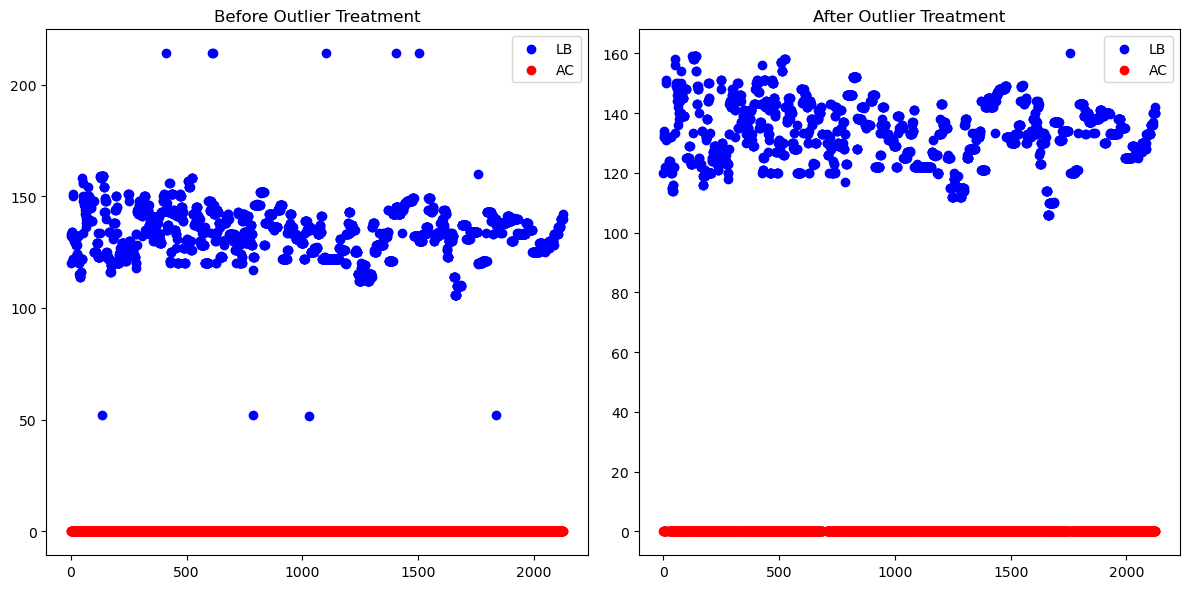

In [7]:
# Visualize data before and after outlier treatment
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Before treatment for two columns 'LB' & 'AC'
axes[0].scatter(df.index, df['LB'], color='blue', label='LB')
axes[0].scatter(df.index, df['AC'], color='red', label='AC')
axes[0].set_title('Before Outlier Treatment')
axes[0].legend()

# After treatment for two columns 'LB' & 'AC'
axes[1].scatter(df_no_outliers.index, df_no_outliers['LB'], color='blue', label='LB')
axes[1].scatter(df_no_outliers.index, df_no_outliers['AC'], color='red', label='AC')
axes[1].set_title('After Outlier Treatment')
axes[1].legend()

plt.tight_layout()
plt.show()

# Task 2: Statistical Summary

Q1. Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

Q2. Highlight any interesting findings from this summary

In [8]:
# Calculate descriptive statistics
summary_stats = df_no_outliers.describe()

# Extract specific measures (mean, median, std, IQR) for interpretation
measures = ['mean', '50%', 'std', '75%']  # 50% represents median, 75% is third quartile (Q3)
summary_stats = summary_stats.loc[measures]

# Display the statistical summary
print("Statistical Summary for Each Variable:")
summary_stats

Statistical Summary for Each Variable:


LB        AC        FM        UC        DL            DS  \
mean  133.306955  0.003194  0.004240  0.004391  0.001732  3.736781e-08   
50%   133.000000  0.001733  0.000000  0.004556  0.000000  0.000000e+00   
std     9.899631  0.003767  0.013554  0.002904  0.002705  6.367633e-07   
75%   141.000000  0.005650  0.002358  0.006579  0.003036  0.000000e+00   

            DP       ASTV      MSTV       ALTV       MLTV      Width  \
mean  0.000102  46.870868  1.283173   9.193894   8.329351  68.930613   
50%   0.000000  48.000000  1.200000   0.000000   7.700000  66.000000   
std   0.000404  16.834525  0.778099  16.574763   5.226398  37.614026   
75%   0.000000  61.000000  1.700000  11.000000  10.900000  98.000000   

      Tendency       NSP  
mean  0.332264  1.244957  
50%   0.000000  1.000000  
std   0.600830  0.528625  
75%   1.000000  1.000000

In [9]:
pd.set_option('display.max_rows', 2000)


df_no_outliers

LB        AC        FM        UC            DL            DS  \
0     120.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
1     132.000000  0.006380  0.000000  0.006380  3.189793e-03  0.000000e+00   
2     133.000000  0.003322  0.000000  0.008306  3.322259e-03  0.000000e+00   
3     134.000000  0.002561  0.000000  0.007742  2.560819e-03  0.000000e+00   
4     131.948232  0.006515  0.000000  0.008143  0.000000e+00  0.000000e+00   
7     122.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
9     122.000000  0.000000  0.000000  0.002967  0.000000e+00  0.000000e+00   
10    151.000000  0.000000  0.000000  0.000834  8.340280e-04  0.000000e+00   
11    150.000000  0.000000  0.000000  0.001014  9.832840e-04  0.000000e+00   
12    131.000000  0.005076  0.072335  0.007614  2.538071e-03  0.000000e+00   
25    124.000000  0.000000  0.000000  0.000000 -3.500000e-05  0.000000e+00   
26    124.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
27    124.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
28    132.000000 -0.000040  0.135113  0.000834  8.340284e-03  0.000000e+00   
30    132.000000  0.000000  0.107590  0.001702  1.000834e-02  0.000000e+00   
32    132.000000  0.000000  0.088643  0.001385  9.636980e-03  0.000000e+00   
33    120.000000  0.007506  0.102585  0.000800  8.340280e-04 -1.790000e-06   
34    120.000000  0.009105  0.084977  0.001517  1.517451e-03  0.000000e+00   
35    120.000000  0.006061  0.109091  0.007273  0.000000e+00  0.000000e+00   
36    115.000000  0.005004  0.079233  0.005004  2.502085e-03  0.000000e+00   
37    114.000000  0.004559  0.000000  0.004559  3.039514e-03  0.000000e+00   
38    115.000000  0.006242  0.064919  0.003745  1.248439e-03  3.667736e-06   
39    115.000000  0.009109  0.054656  0.005061  0.000000e+00  0.000000e+00   
40    114.000000  0.008340  0.057548  0.006672  8.340280e-04  0.000000e+00   
41    114.000000  0.006006  0.047041  0.009105  0.000000e+00  0.000000e+00   
42    116.000000  0.001517  0.037936  0.004532  0.000000e+00  0.000000e+00   
43    116.000000  0.003861  0.011583  0.005148  0.000000e+00  0.000000e+00   
44    122.000000  0.000000  0.017995  0.002571  5.141388e-03  0.000000e+00   
45    122.000000  0.000000  0.020144  0.002878  5.755396e-03  0.000000e+00   
49    158.000000  0.005004  0.000000  0.007506  8.340280e-04  0.000000e+00   
50    133.343598  0.003219  0.000000  0.008086  0.000000e+00  2.508984e-06   
51    156.000000  0.000000  0.000000  0.012048  7.530120e-03  0.000000e+00   
53    150.000000  0.000000  0.000834  0.000000  8.340280e-04  0.000000e+00   
55    149.000000  0.000000  0.000000  0.000000  1.668057e-03  0.000000e+00   
56    149.000000  0.000000  0.000000 -0.000012  9.033420e-04  0.000000e+00   
57    146.000000  0.000000  0.000000  0.006144  0.000000e+00  0.000000e+00   
58    148.000000  0.000000  0.000000  0.005181  0.000000e+00  0.000000e+00   
59    144.000000  0.008143  0.000000  0.006595  0.000000e+00  0.000000e+00   
61    146.000000  0.004580 -0.001776  0.004580  0.000000e+00  0.000000e+00   
62    142.000000  0.000000  0.000000  0.003311  0.000000e+00  0.000000e+00   
63    136.000000  0.002513  0.000000  0.005025  0.000000e+00  0.000000e+00   
65    150.000000  0.000000  0.000000  0.004127  0.000000e+00  0.000000e+00   
66    138.000000  0.001307 -0.001202  0.003922  0.000000e+00  0.000000e+00   
67    140.000000  0.007278  0.000000  0.004367  0.000000e+00  0.000000e+00   
68    140.000000  0.007278  0.000000  0.004367  0.000000e+00  0.000000e+00   
69    144.000000  0.000000  0.000000  0.004992  0.000000e+00 -3.240000e-06   
70    144.000000  0.001235  0.000000  0.004938  0.000000e+00  0.000000e+00   
71    140.000000  0.009970  0.005982  0.002991  0.000000e+00  0.000000e+00   
72    140.000000  0.008130  0.005420  0.000000  0.000000e+00  0.000000e+00   
73    140.000000  0.008386  0.004193  0.004193  0.000000e+00  0.000000e+00   
74    140.000000  0.005944  0.003467

#### Interesting findings from this summary:

1. Variability: There is notable variability in measures such as accelerations, fetal movements, and variability metrics (ASTV, 
   MSTV, ALTV, MLTV), indicating diverse patterns in fetal heart rate monitoring.
2. Rare Events: Decelerations (short, prolonged, and late) are infrequent, with most observations showing very low rates.
3. Abnormal Variability: Abnormal short-term variability (ASTV) is observed frequently, suggesting potential concerns in fetal 
   heart rate patterns that may warrant further investigation.

These findings highlight the diversity and potential complexities in fetal heart rate monitoring data, emphasizing the 
importance of detailed statistical analysis to understand patterns and deviations from normalcy in clinical contexts.

# Task 3: Data Visualization

Q1. Create histograms or boxplots to visualize the distributions of various numerical variables.

Q2. Use bar charts or pie charts to display the frequency of categories for categorical variables.

Q3. Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

Q4. Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

In [10]:
numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

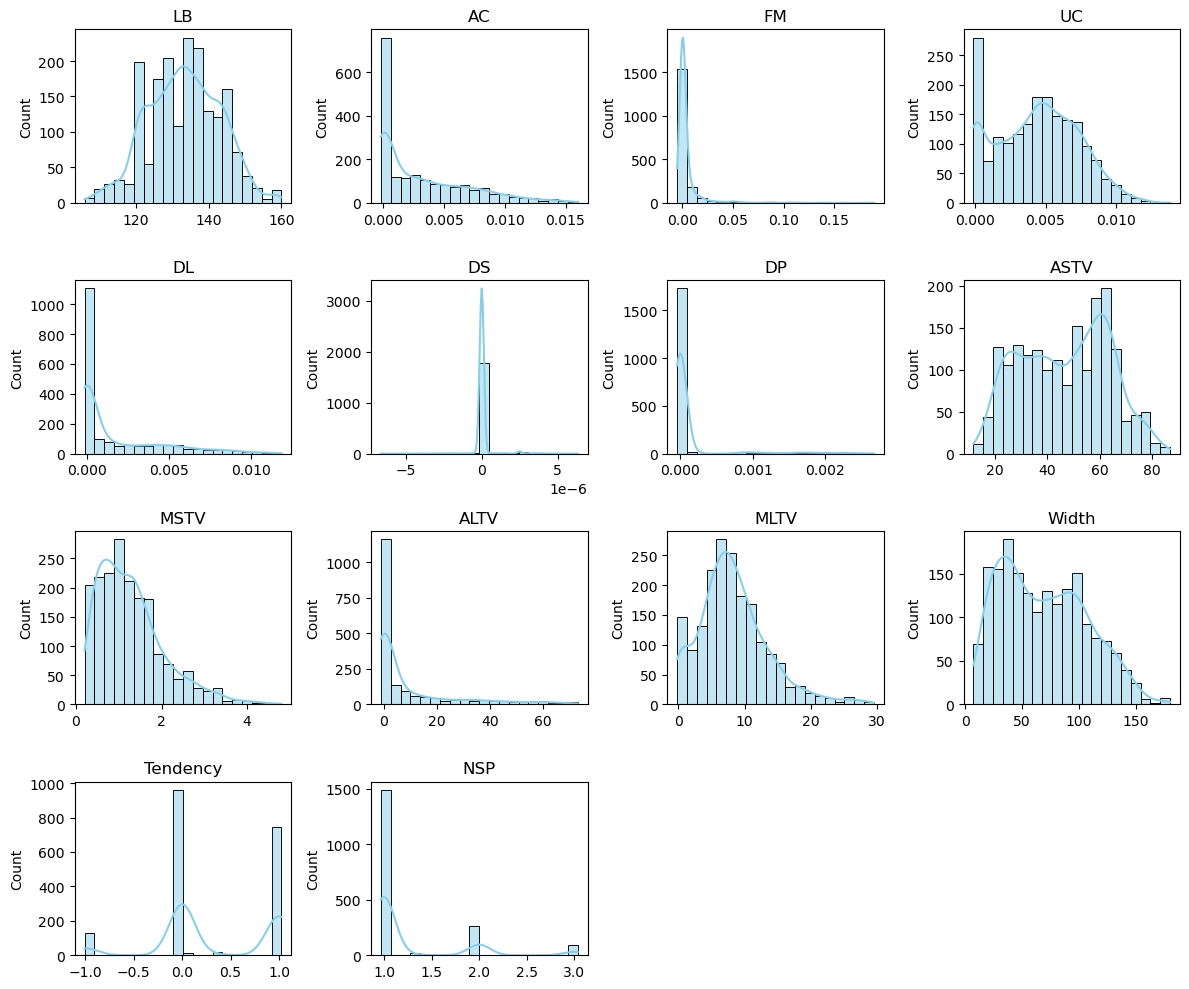

In [11]:
# Create histograms to visualize the distributions of various numerical variables.

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_no_outliers[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

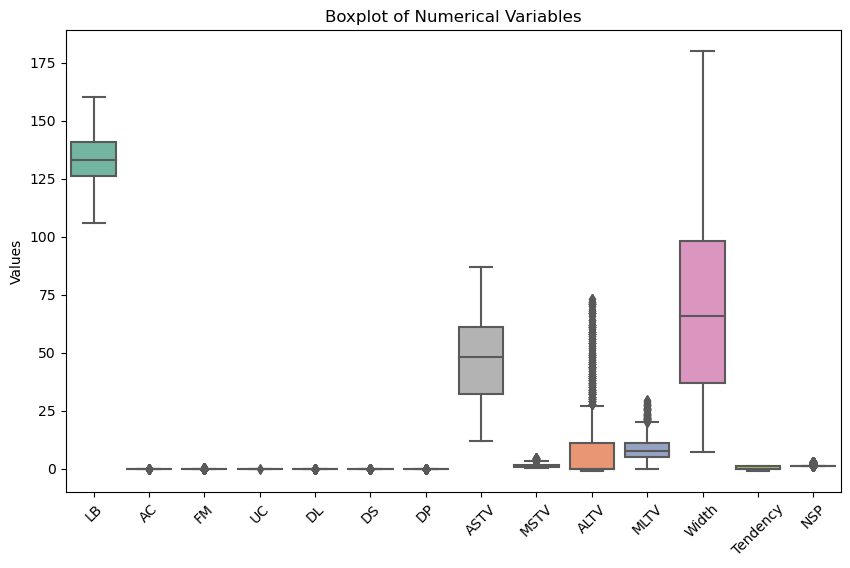

In [12]:
# Create boxplots to visualize the distributions of various numerical variables.

# Boxplot for each numerical variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, orient='v', palette='Set2')
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Use bar charts or pie charts to display the frequency of categories for categorical variables.

# Identify columns having categorical variables

categorical_cols = []

# Iterate through each column in the DataFrame
for col in df_no_outliers.columns:
    # Check if the column is of object type (usually categorical)
    if pd.api.types.is_categorical_dtype(df_no_outliers[col]) or pd.api.types.is_object_dtype(df_no_outliers[col]):
        categorical_cols.append(col)

categorical_cols

[]

As there are no categorical variables, we cannot use bar charts or pie charts for displaying their frequency.

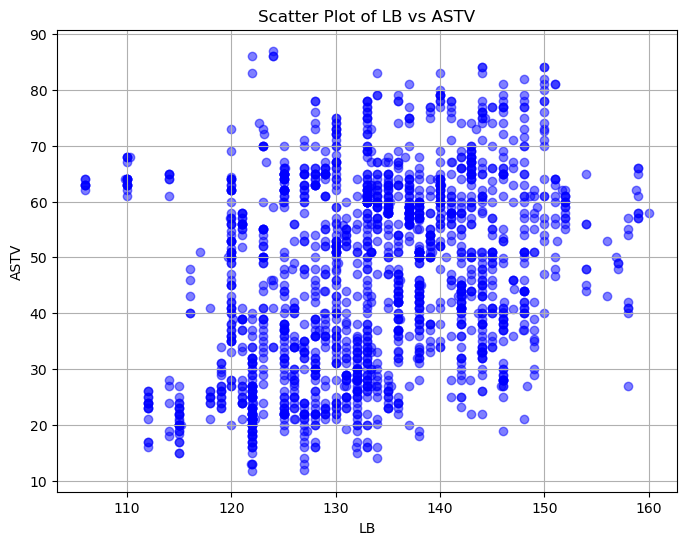

In [14]:
# Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

# Specify the two variables for the scatter plot
var1 = 'LB'
var2 = 'ASTV'

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers[var1], df_no_outliers[var2], color='blue', alpha=0.5)  # alpha controls transparency

# Add labels and title
plt.title(f'Scatter Plot of {var1} vs {var2}')
plt.xlabel(var1)
plt.ylabel(var2)

# Display grid
plt.grid(True)

# Show plot
plt.show()

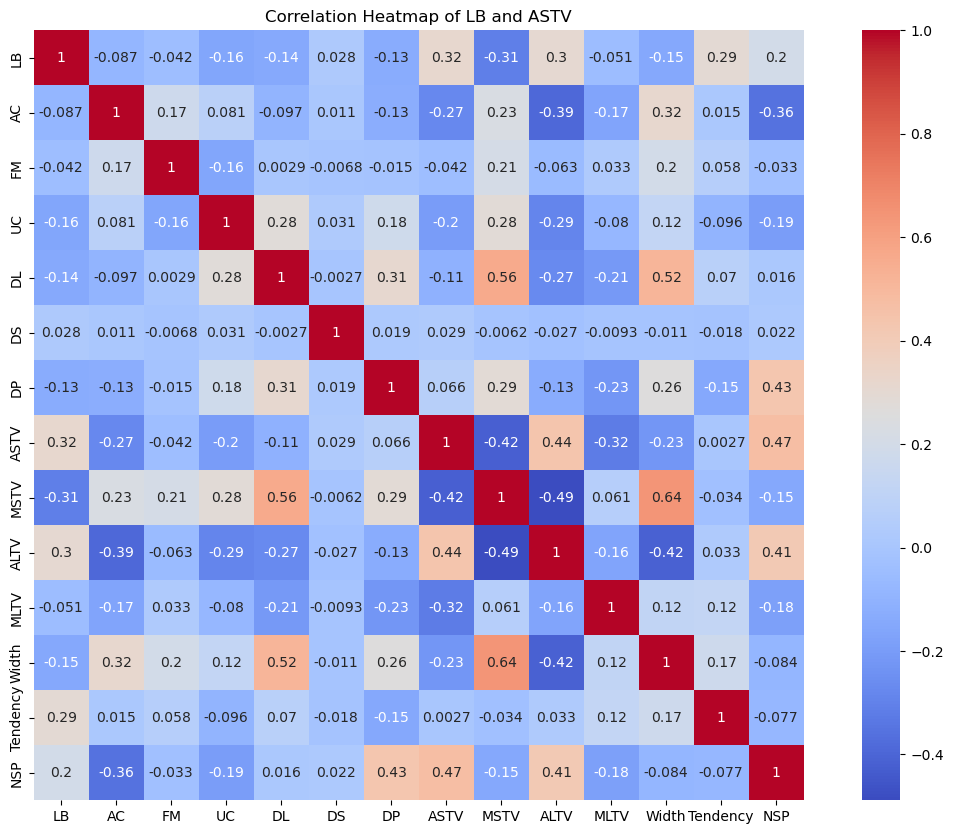

In [15]:
# Calculate correlation matrix
corr_matrix = df_no_outliers.corr()

# Generate heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title
plt.title(f'Correlation Heatmap of {var1} and {var2}')

# Show plot
plt.show()

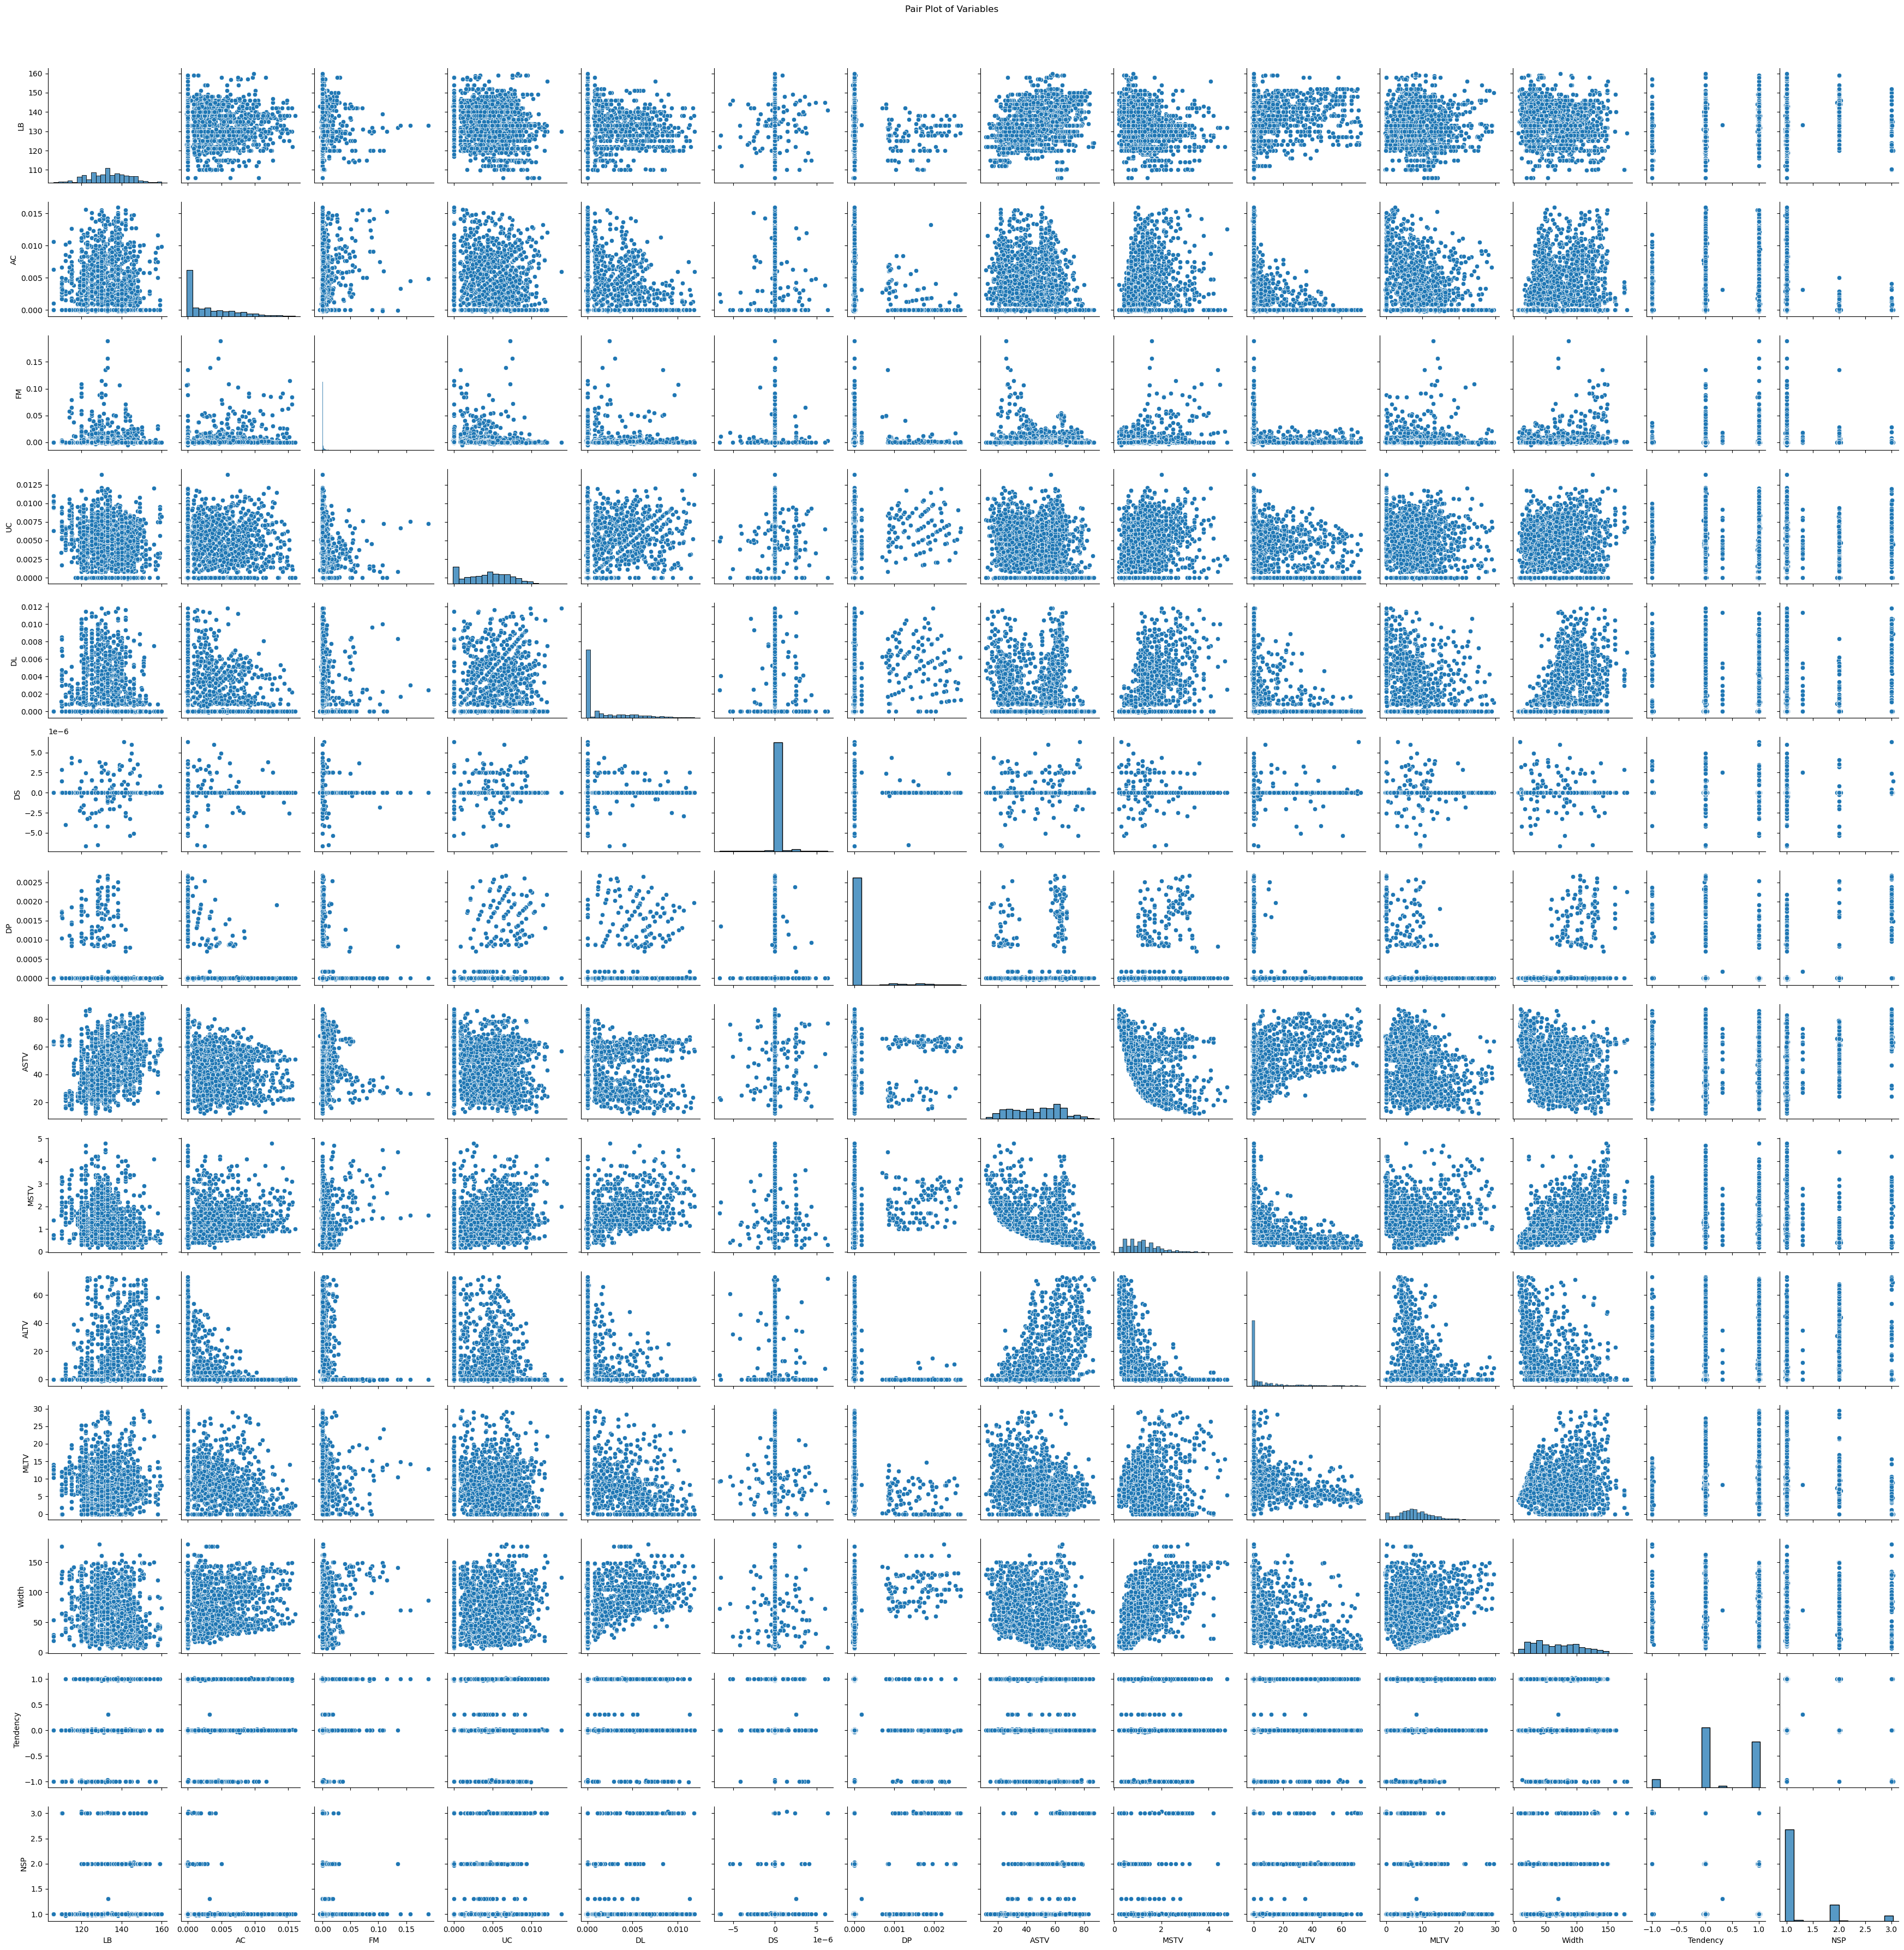

In [16]:
# Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

# Create pair plot
sns.pairplot(df_no_outliers)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.tight_layout()
plt.show()

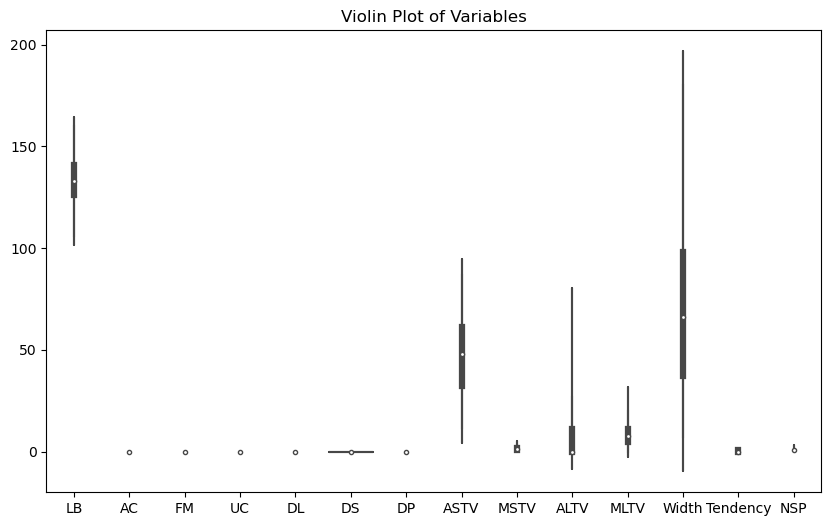

In [17]:
# Create violin plot without outliers
plt.figure(figsize=(10, 6))
sns.violinplot(df_no_outliers)
plt.title('Violin Plot of Variables')
plt.show()

# Task 4: Pattern Recognition and Insights

Q1. Identify any correlations between variables and discuss their potential implications.

Q2. Look for trends or patterns over time if temporal data is available.

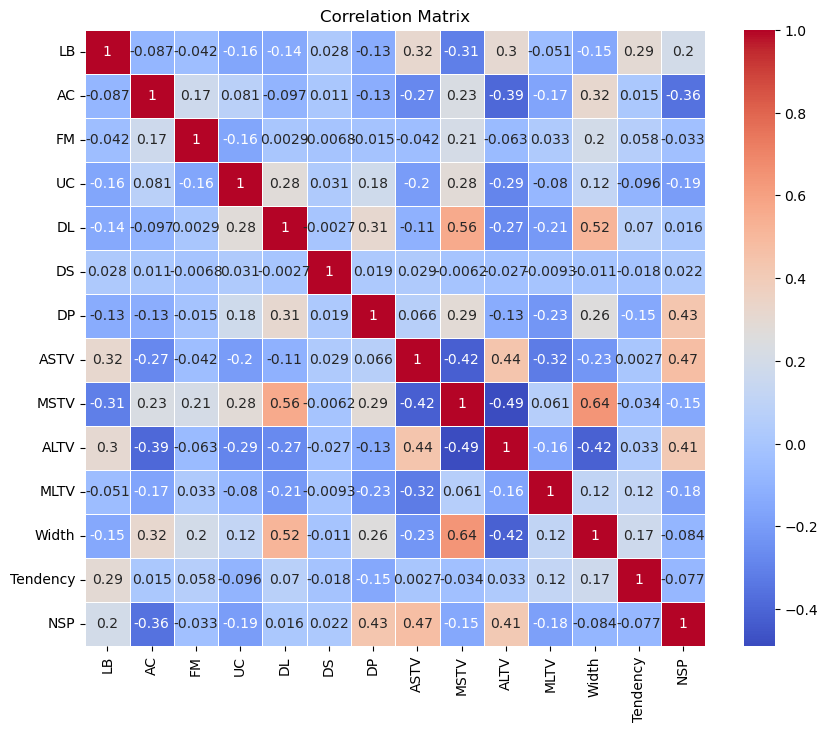

In [18]:
# Check for correlations
correlation_matrix = df_no_outliers.corr()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Check column data types to identify temporal data
temporal_columns = []

for column in df_no_outliers.columns:
    if pd.api.types.is_datetime64_any_dtype(df_no_outliers[column]):
        temporal_columns.append(column)

# Print out temporal columns found
if temporal_columns:
    print("Temporal data columns found:")
    for col in temporal_columns:
        print(f"- {col}")
else:
    print("No temporal data columns found.")

No temporal data columns found.


Since there is no temporal data in the dataset, we cannot look for trends or patterns over time.

# Task 5: Conclusion

Q1. Summarize the key insights and patterns discovered through your exploratory analysis.

Q2. Discuss how these findings could impact decision-making or further analyses.

#### Key Insights

1. ASTV (Abnormal Short-term Variability) shows strong positive correlations with NSP (Fetal State Class), indicating that higher abnormal short-term variability is associated with different fetal states.
2. MSTV (Mean Short-term Variability) correlates strongly with Width, suggesting that as mean short-term variability increases, the width of certain measurements also tends to increase.
3. LB (Fetal Heart Rate Baseline) exhibits moderate correlations with ASTV, Width, and Tendency, indicating its association with variability measures and the general tendency of measurements over time.
4. ALTV (Abnormal Long-term Variability) shows moderate correlations with ASTV and MSTV, indicating its relationship with both short-term and mean variability measures.

#### Interpretation

1. Variability Measures: ASTV and MSTV are crucial indicators of fetal health, with ASTV particularly linked to immediate fetal state classification (NSP) and MSTV associated with broader variability and measurement characteristics.
2. Fetal Heart Rate: LB's correlations with ASTV, Width, and Tendency suggest it plays a role in understanding the variability and trends in fetal heart rate over time.
3. Clinical Relevance: Understanding these correlations helps in clinical decision-making, as abnormalities in ASTV and MSTV can signal potential fetal distress, while LB provides baseline information about heart rate variations.

#### Overall Patterns and Insights

1. Variability Measures (ASTV and MSTV): These variables (ASTV and MSTV) show significant correlations with each other and with other parameters like NSP, ALTV, and Width. Higher ASTV tends to be associated with abnormal short-term variability, while higher MSTV correlates with mean variability and width.
2. Fetal Heart Rate (LB): LB shows moderate associations with various parameters, including some measures of variability (ASTV, MSTV), UC, DL, and Tendency. These relationships indicate LB's sensitivity to changes in fetal health and monitoring conditions.
3. Acceleration (AC): AC is notably correlated with ALTV and shows moderate associations with other parameters. This suggests AC's role in indicating abnormalities related to long-term variability.

#### Insights for Further Analysis

1. Correlation Strength: Strong correlations such as those between ASTV and NSP indicate direct clinical relevance and should be further explored to understand predictive capabilities.
2. Variable Associations: The negative correlations of variables like AC with ALTV highlight potentially contrasting roles in fetal health monitoring, warranting deeper investigation into their combined predictive power.
3. Clinical Application: These insights can guide clinicians in interpreting monitoring data more effectively, potentially leading to better decision-making regarding interventions and patient management.


#### Impact on decision making and further analysis

1. Clinical Decision-Making:
    1. Risk Assessment: Understanding the strong correlations between variables like ASTV and NSP (Fetal State Class) can help clinicians assess fetal health more accurately. Higher ASTV might indicate increased fetal distress or variability in fetal heart rate, prompting closer monitoring or intervention.
    2. Predictive Insights: Identifying variables with strong correlations, such as MSTV with Width, can provide predictive insights into fetal health trends. Clinicians can use this information to anticipate changes in fetal conditions and make proactive decisions.
2. Patient Management:
    1. Individualized Care: Tailoring care based on variability measures (ASTV, MSTV) and their correlations with other metrics (like LB) can lead to more personalized treatment plans. For example, monitoring changes in ASTV alongside LB can provide a comprehensive view of fetal well-being over time.
    2. Timely Interventions: Recognizing patterns in variability measures can enable earlier detection of potential complications, allowing for timely interventions that may mitigate risks or improve outcomes for both the fetus and the mother.
3. Further Analyses and Research:
    1. Validation Studies: The identified correlations can serve as a basis for validation studies in larger datasets or different populations. Confirming these findings across diverse patient groups can enhance their applicability and reliability in clinical practice.
    2. Exploring Causality: While correlations provide valuable associations, further analyses could delve into causal relationships. Understanding why certain variables (e.g., ASTV) strongly correlate with outcomes (e.g., NSP) can elucidate underlying physiological mechanisms and guide targeted research efforts.
4. Technological and Methodological Advancements:
    1. Enhanced Monitoring Technologies: Insights into variable associations may spur advancements in fetal monitoring technologies. For instance, developing algorithms that integrate multiple variability measures (ASTV, MSTV) could improve real-time assessments and decision support for clinicians.
    2. Methodological Refinements: Refining measurement techniques and standardizing protocols based on correlated variables can enhance data quality and comparability across different healthcare settings.